In [155]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
from scipy.optimize import fsolve
from IPython.display import IFrame
import sympy as sym
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from tqdm import tqdm 

# 0.1 Ecuación diferencial no lineal

In [2]:
%time
q = [0., 0.2, 0.4, 0.7, 0.9, 1.]
def GetSol(i):
    if q[i] == 1:
        def f(Q, x):
            return x
    else:
        def f(Q, x):
            return x**q[i]
        
    solution = solve_ivp( f, (t[0], t[-1]), x0, t_eval = t, method = 'RK45' )

    return solution

Wall time: 0 ns


In [3]:
N = 30
t = np.linspace(0.,10.,N+1)
x0 = np.array([1])

In [4]:
integral = np.zeros([len(q)])
for j in range(len(q)):
    s = GetSol(j)
    integral[j] = s.y[0][-1]-s.y[0][0]

In [5]:
def Analitic(i):
    t0=0
    tmax=10
    if q[i]==1:
        s = np.e**(tmax)-np.e**(t0)
    else:
        s = (tmax*(1-q[i])+1)**(1/(1-q[i]))-(t0*(1-q[i])+1)**(1/(1-q[i]))
    
    return s

In [6]:
integralAn = np.zeros([len(q)])
for j in range(len(q)):
    s = Analitic(j)
    integralAn[j] = s

<IPython.core.display.Javascript object>


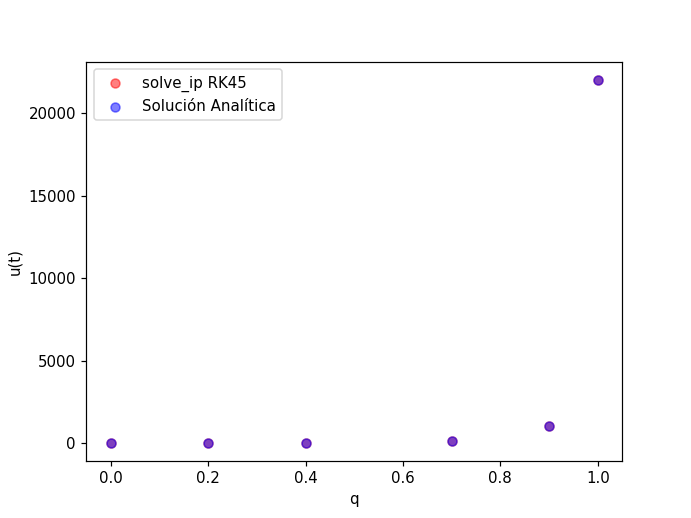

In [9]:
plt.xlabel('q')
plt.ylabel('u(t)')
plt.scatter(q, integral, c='r', label='solve_ip RK45', alpha = 0.5)
plt.scatter(q, integral, c='b', label = 'Solución Analítica', alpha = 0.5)
plt.legend()

# 0.2 Métodos multipaso

In [10]:
t = sym.Symbol('t', Real = True)
h = sym.Symbol('h', Real = True)

In [11]:
#Adams Bashforth 3 puntos

F1 = (t-(-h))*(t-(-2*h))/((0-(-h))*(0-(-2*h)))
F2 = (t-(0))*(t-(-2*h))/(((-h)-0)*((-h)-(-2*h)))
F3 = (t-(0))*(t-(-h))/(((-2*h)-0)*((-2*h)-(-h)))

In [12]:
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
print(I1, I2, I3)

23*h/12 -4*h/3 5*h/12


In [13]:
#Adams Multon 3 puntos
F1 = (t-(h))*(t-(2*h))/((0-(h))*(0-(2*h)))
F2 = (t-(0))*(t-(2*h))/(((h)-0)*((h)-(2*h)))
F3 = (t-(0))*(t-(h))/(((2*h)-0)*((2*h)-(h)))

In [14]:
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
print(I1, I2, I3)

5*h/12 2*h/3 -h/12


In [15]:
#Adams Bashforth 3 puntos

F1 = ((t-(-h))*(t-(-2*h))*(t-(-3*h)))/((0-(-h))*(0-(-2*h))*(0-(-3*h)))
F2 = ((t-(0))*(t-(-2*h))*(t-(-3*h)))/((-h-(0))*(-h-(-2*h))*(-h-(-3*h)))
F3 = ((t-(0))*(t-(-h))*(t-(-3*h)))/((-2*h-(-h))*(-2*h-(0))*(-2*h-(-3*h)))
F4 = ((t-(0))*(t-(-h))*(t-(-2*h)))/((-3*h-(-h))*(-3*h-(-2*h))*(-3*h-(0)))

In [16]:
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
I4 = sym.integrate(F4, (t,0,h))
print(I1, I2, I3,I4)

55*h/24 -59*h/24 37*h/24 -3*h/8


In [17]:
#Adams Bashforth 4 puntos

F1 = ((t-(h))*(t-(2*h))*(t-(3*h)))/((0-(h))*(0-(2*h))*(0-(3*h)))
F2 = ((t-(0))*(t-(2*h))*(t-(3*h)))/((h-(0))*(h-(2*h))*(h-(3*h)))
F3 = ((t-(0))*(t-(h))*(t-(3*h)))/((2*h-(h))*(2*h-(0))*(2*h-(3*h)))
F4 = ((t-(0))*(t-(h))*(t-(2*h)))/((3*h-(h))*(3*h-(2*h))*(3*h-(0)))

In [18]:
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
I4 = sym.integrate(F4, (t,0,h))
print(I1, I2, I3,I4)

3*h/8 19*h/24 -5*h/24 h/24


# 0.3 Gravitational N-body problem

In [147]:
G = 4*np.pi**2
e = 0.1
m = 0.01

In [218]:
class Particle():
    
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt = t[1]-t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros((len(t),len(r0)))
        self.vVector = np.zeros((len(t),len(v0)))
        self.aVector = np.zeros((len(t),len(a0)))
        
        self.L = np.zeros(len(r0))
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        self.MomentumVector = np.zeros((len(t),len(v0)))
        self.AngularMomentumVector = np.zeros((len(t),len(v0)))
        
        self.EpVector = np.zeros((len(t),1))
        self.EkVector = np.zeros((len(t),1))
        
        
        self.Ep = 0.
        self.Force = self.m * self.a
        self.G = 4*np.pi**2
        self.e = 0.1
        
        # Initial condition
        
        # Esto significa en el pasado
        
        self.rp = r0
        self.vp = v0
        
           
        
    def Evolution(self,i):
        
        # fill vectors
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetMomentum(i,self.m*self.v)
        
        
        # Energy 
        
        self.SetEk(i,self.GetKineticEnergy())
        self.SetEp(i,self.GetPotentialEnergy())
        
        # Change variables using the verlet method
        
        self.a = self.Force/self.m
        
     
        if i == 0:
            
            self.rp = self.r
            #Euler
            self.r = self.rp + self.dt * self.v
        
        else:
            
            #Verlet rp: r_pasado, rf: r_futuro
            self.rf = 2*self.r - self.rp + self.a * self.dt**2            
            self.v = ( self.rf - self.rp ) / (2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
        
  
            
    def ResetForce(self):
        
        self.Force[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.
        
    
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v   
        
    def SetMomentum(self,i,p):
        self.MomentumVector[i] = p
        
    def SetAngularMomentum(self,i,r,p):
        
        #Momento angular _producto cruz
        self.L[0] = r[1]*p[2] - r[2]*p[1]
        self.L[1] = -(r[0]*p[2] - r[2]*p[0])
        self.L[2] = r[0]*p[1] - r[1]*p[0]
        
        self.AngularMomentumVector[i] = self.L
            
    def SetEk(self,i,Ek):
        self.EkVector[i] = Ek
    
    def SetEp(self,i,Ep):
        self.EpVector[i] = Ep

    
    # Getters
    
    def GetForce(self,p):
        
        d = np.linalg.norm( self.r - p.GetPosition() )
        
        Fn = - self.G * self.m * p.m / (d**2+self.e**2)**1.5
        
        self.Force = np.add( self.Force, Fn* (self.r - p.GetPosition())  )
        
        self.Ep += - 0.5*self.G * self.m * p.m / (d**2+self.e**2)**0.5
                
    
    def GetPosition(self):
        return self.r
    
    def GetPositionVector(self):
        return self.rVector
    
    def GetReducePosition(self):
        return self.RrVector
        
    def GetVelocityVector(self):
        return self.vVector    
    
    def GetMomentumVector(self):
        return self.MomentumVector
    
    def GetAngularMomentumVector(self):
        return self.AngularMomentumVector
        
    def GetReduceVelocity(self):
        return self.RvVector
     
    def GetKineticEnergy(self):
        return 0.5*self.m*np.linalg.norm(self.v)**2
    
    def GetPotentialEnergy(self):
        #return -np.dot( self.m*self.a, self.r )
        return 0.5*self.Ep 
   
    def GetNetForce(self):
        return self.Force

    def GetR(self):
        return self.radius
  
    # Reducing size
    #factor = 20
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]])
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
        self.RvVector = np.array([self.vVector[0]])
        
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])

In [219]:
def GetParticles(NParticles,Limit,Dim=3,dt=0.1):
    
    Particles_ = []
    G = 4*np.pi**2
    x0 = np.random.uniform(-1, 1, NParticles)
    y0 = np.random.uniform(-1, 1, NParticles)
    z0 = np.random.uniform(-1, 1, NParticles)
    
    for i in range(NParticles):
        r0 = np.array([x0[i], y0[i], z0[i]])
        v0 = np.array([0.,0.,0.])
        a0 = np.array([0.,0.,0.])
        
        
        p = Particle(r0,v0,a0,t,m,0.03,i)
        
        Particles_.append(p)
        
        
    return Particles_

In [220]:
Limits = np.array([2.,2.,2.])

In [221]:
def RunSimulation(t,NParticles = 10):
    
    # Creating the particles
    Particles = GetParticles(NParticles,Limits[0],dt=dt)
      
    for it in tqdm(range(len(t))):
        
        NetForce = np.array([0,0,0])
        
        for i in range(len(Particles)):    
            for j in range(len(Particles)):
                if i != j:
                    Particles[i].GetForce(Particles[j])
             
        #    NetForce = np.add(NetForce,Particles[i].GetNetForce())
            
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            
            #Particles[i].CheckWallLimits(Limits)
             
        #print(NetForce)
        
    return Particles

In [222]:
dt = 0.001
tmax = 2.
t = np.arange(0.,tmax+dt,dt)

In [223]:
Particles = RunSimulation(t,100,Velo = 20)

100%|██████████████████████████████████████████████████████████████████████████████| 2001/2001 [15:44<00:00,  2.12it/s]


In [224]:
EnergiaK = Particles[0].EkVector
EnergiaP = Particles[0].EpVector
EnergiaTotal = Particles[0].EkVector + Particles[0].EpVector
for i in range(1,len(Particles)):
    EnergiaK = np.add(EnergiaK, Particles[i].EkVector)
    EnergiaP = np.add(EnergiaP, Particles[i].EpVector)
    EnergiaTotal = np.add(EnergiaTotal, Particles[i].EkVector + Particles[i].EpVector) 
Momentum = Particles[0].GetMomentumVector()
for i in range(1,len(Particles)):
    Momentum = np.add(Momentum, Particles[i].GetMomentumVector()) 
    
LMomentum = Particles[0].GetAngularMomentumVector()
for i in range(1,len(Particles)):
    LMomentum = np.add(LMomentum, Particles[i].GetAngularMomentumVector())

<IPython.core.display.Javascript object>


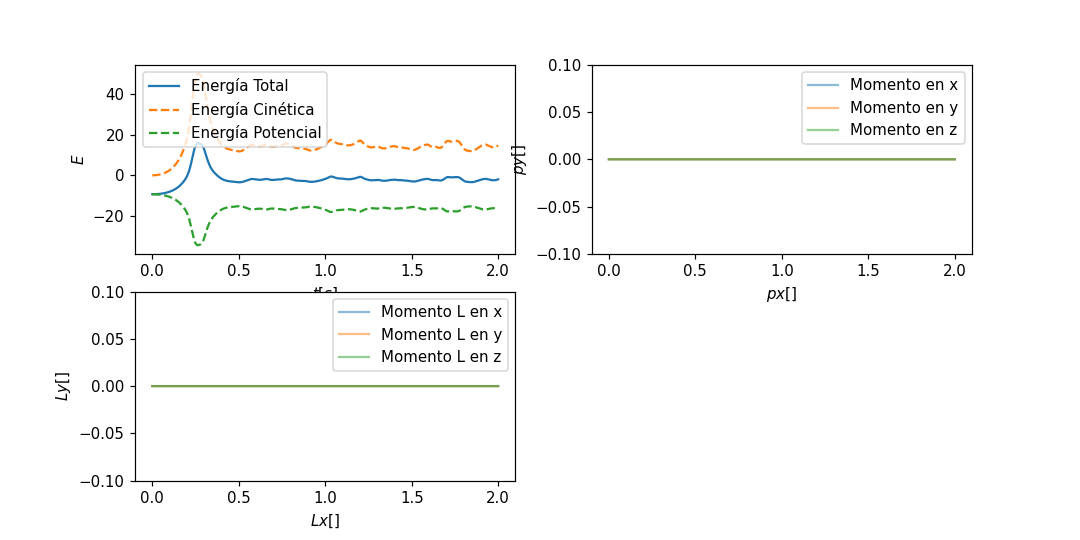

In [227]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(2,2,1)
ax2 = fig1.add_subplot(2,2,2)
ax3 = fig1.add_subplot(2,2,3)

ax1.plot(t,EnergiaTotal, label='Energía Total')
ax1.plot(t,EnergiaK,'--',label='Energía Cinética')
ax1.plot(t,EnergiaP,'--',label='Energía Potencial')
ax1.set_xlabel(r'$t[s]$',fontsize=10)
ax1.set_ylabel(r'$E$',fontsize=10)
#ax1.set_yscale('log')
ax1.legend(loc=0)


ax2.plot(t,Momentum[:,0], label='Momento en x', alpha = 0.5)
ax2.plot(t,Momentum[:,1], label='Momento en y', alpha = 0.5)
ax2.plot(t,Momentum[:,2], label='Momento en z', alpha = 0.5)
ax2.set_xlabel(r'$px[]$',fontsize=10)
ax2.set_ylabel(r'$py[]$',fontsize=10)
ax2.legend(loc=0)
ax2.set_ylim(-0.1,0.1)

ax3.plot(t,Momentum[:,0], label='Momento L en x', alpha = 0.5)
ax3.plot(t,Momentum[:,1], label='Momento L en y', alpha = 0.5)
ax3.plot(t,Momentum[:,2], label='Momento L en z', alpha = 0.5)
ax3.set_xlabel(r'$Lx[]$',fontsize=10)
ax3.set_ylabel(r'$Ly[]$',fontsize=10)
ax3.legend(loc=0)
ax3.set_ylim(-0.1,0.1)

plt.show()

In [228]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
    
    Newt = []
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [229]:
redt = ReduceTime(t,50)

<IPython.core.display.Javascript object>


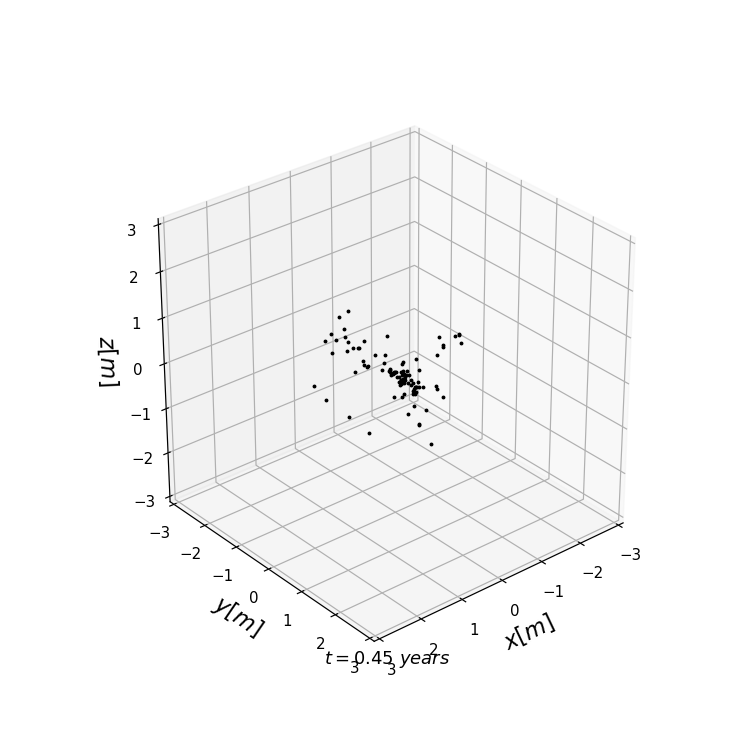

In [230]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1, projection = '3d',elev = 30, azim = 50)
    
def init():
    ax.set_xlabel(r'$x[m]$',fontsize=15)
    ax.set_ylabel(r'$y[m]$',fontsize=15)
    ax.set_zlabel(r'$z[m]$',fontsize=15)
    ax.set_xlim(-Limits[0]-1,Limits[0]+1)
    ax.set_ylim(-Limits[1]-1,Limits[1]+1)
    ax.set_zlim(-Limits[2]-1,Limits[2]+1)


def Update(i):
    
    plot = ax.clear()
    init()
    
    j = 0
    plot = ax.legend(r'$t=%.2f \ years$' %(redt[i]))
    
    for p in Particles:
        
        x = p.GetReducePosition()[i,0]
        y = p.GetReducePosition()[i,1]
        z = p.GetReducePosition()[i,2]
        
        vx = p.GetReduceVelocity()[i,0]
        vy = p.GetReduceVelocity()[i,1]
        vz = p.GetReduceVelocity()[i,2]
    
        
        plot = ax.scatter(x,y,z,marker='.',color='k',s= 10)
   
        
            
    return plot
    
Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

In [232]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=10, metadata=dict(artist='Me'))
Animation.save('NBody.mp4', writer=writer_)

# 0.4 4-order simplectic integrator (Yoshida)

In [179]:
#LeapFrog
N = 200
t = np.linspace(0, 10, N+1)
h = (t[-1])/float(N)

In [132]:
def F(x):
    return -x

In [133]:
r0 = np.array([1.0,0])

In [134]:
def GetLeapFrog(r0,t):
    
    N = len(t)+1
    h = t[1] - t[0]
    
    t1 = np.arange(t[0] - 0.5*h, t[-1] - 0.5*h + h, h)
    
    x = np.zeros(N)
    v = np.zeros(N) # El inicializador
    
    #Euler
    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*F(x[0]) 
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*F(x[i-1])
        x[i] = x[i-1] + h*v[i]
    
    # Igualando los array
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    
    #print(len(X),len(V))
    
    return X,V

In [135]:
x_lf, v_lf= GetLeapFrog(r0,t)

In [136]:
Elf = 0.5*(x_lf**2) + 0.5*v_lf**2
meanE = np.mean(E)

In [137]:
#Yoshida

In [138]:
def GetCoefY():
    w0 = -(2**(1/3))/(2 - 2**(1/3))
    w1 = 1/(2 - 2**(1/3))
    
    c1 = w1/2
    c2 = (w0+w1)/2
    c3 = c2
    c4 = c1
    
    d1 = w1
    d2 = w0
    d3 = d1
    
    c = np.array([c1, c2, c3, c4])
    d = np.array([d1, d2, d3])
    return c, d

In [139]:
def GetYoshida(r0, t):
    
    h = t[1]-t[0]
    c, d = GetCoefY()
    N = len(t)
    
    x = np.zeros(N)
    v = np.zeros(N)
    
    #Para inicializar
    x[0] = r0[0]
    v[0] = r0[1]
    for i in range(1, N):
        
        x1 = x[i-1] + c[0]*v[i-1]*h
        v1 = v[i-1] + d[0]*F(x1)*h
    
        x2 = x1 + c[1]*v1*h
        v2 = v1 + d[1]*F(x2)*h
        
        x3 = x2 + c[2]*v2*h
        v3 = v2 + d[2]*F(x3)*h
        
        x4 = x3 + c[3]*v3*h
        v4 = v3
        
        x[i] = x4
        v[i] = v4    
        
    return x, v

In [140]:
xy, vy = GetYoshida(r0, t)

In [143]:
Ey = 0.5*(xy**2) + 0.5*vy**2

<IPython.core.display.Javascript object>


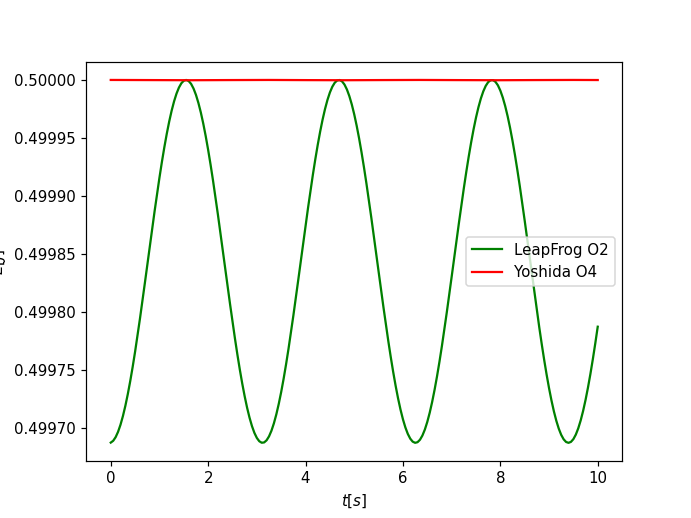

In [145]:
plt.xlabel('$t[s]$')
plt.ylabel('$E[J]$')
plt.plot(t, Elf, 'g', label = 'LeapFrog O2')
plt.plot(t, Ey, 'r', label = 'Yoshida O4')
plt.legend()
